# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is '/Users/oliver/Downloads/'



In [2]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = "/Users/oliver/Downloads/Crimes_-_2001_to_Present.csv" #(or slice correct index from the crime_files list)

if RAW_FILE == "YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'/Users/oliver/Downloads/Crimes_-_2001_to_Present.csv'

In [3]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [5]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818530,12936285,JF526139,06/27/2022 10:05:00 AM,025XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1935,19.00,43.00,7.00,11,"1,170,513.00","1,917,030.00",2022,01/03/2023 03:46:28 PM,41.93,-87.65,"(41.927817456, -87.648845932)"
7818531,12936301,JF526810,12/22/2022 06:00:00 PM,020XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1921,19.00,32.00,5.00,14,"1,161,968.00","1,923,233.00",2022,01/03/2023 03:46:28 PM,41.95,-87.68,"(41.945021752, -87.680071764)"
7818532,12936397,JF526745,12/19/2022 02:00:00 PM,044XX N ROCKWELL ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1911,19.00,47.00,4.00,05,"1,158,237.00","1,929,586.00",2022,01/03/2023 03:46:28 PM,41.96,-87.69,"(41.962531969, -87.693611152)"
7818533,12935341,JF525383,12/20/2022 06:45:00 AM,027XX W ROOSEVELT RD,0810,THEFT,OVER $500,STREET,False,False,1135,11.00,28.00,29.00,06,"1,158,071.00","1,894,595.00",2022,01/03/2023 03:46:28 PM,41.87,-87.70,"(41.866517317, -87.695178701)"


In [6]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [7]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,3212105,HK228274,01/01/2001 01:00:00 AM,029XX W 38TH PL,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.00,14.00,58.00,02,"1,157,298.00","1,878,997.00",2001,03/31/2006 10:03:38 PM,41.82,-87.70,"(41.823730366, -87.69843979)"
2001-01-01 01:00:00,1310741,G001135,01/01/2001 01:00:00 PM,047XX N ELSTON AV,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,NaN,08B,"1,145,613.00","1,931,427.00",2001,08/17/2015 03:03:40 PM,41.97,-87.74,"(41.96783306, -87.739978195)"
2001-01-01 01:00:00,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.00,NaN,NaN,14,"1,173,036.00","1,906,862.00",2001,08/17/2015 03:03:40 PM,41.90,-87.64,"(41.899860332, -87.63987705)"
2001-01-01 01:00:00,1310393,G000713,01/01/2001 01:00:00 AM,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,NaN,14,"1,116,671.00","1,933,824.00",2001,08/17/2015 03:03:40 PM,41.97,-87.85,"(41.974911416, -87.846347904)"
2001-01-01 01:00:00,1317937,G001149,01/01/2001 01:00:00 AM,024XX E 73 ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.00,NaN,NaN,08B,"1,193,629.00","1,856,985.00",2001,08/17/2015 03:03:40 PM,41.76,-87.57,"(41.762514064, -87.565876899)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07 12:50:00,13098700,JG291215,06/07/2023 12:50:00 AM,033XX N LARAMIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1634,16.00,31.00,15.00,08B,"1,141,112.00","1,921,670.00",2023,06/14/2023 04:48:59 PM,41.94,-87.76,"(41.94114331, -87.756769567)"
2023-06-07 12:50:00,13100032,JG291841,06/07/2023 12:50:00 PM,064XX W FULLERTON AVE,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,SMALL RETAIL STORE,False,False,2512,25.00,36.00,19.00,04A,"1,132,982.00","1,915,246.00",2023,06/14/2023 04:48:59 PM,41.92,-87.79,"(41.923661276, -87.786801448)"
2023-06-07 12:50:00,13099211,JG291770,06/07/2023 12:50:00 PM,099XX S LA SALLE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,False,False,511,5.00,9.00,49.00,14,"1,177,026.00","1,839,028.00",2023,06/14/2023 04:48:59 PM,41.71,-87.63,"(41.713628185, -87.627268742)"


In [8]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate the Full Dataset by Years

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486804
2001    485884
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370500
2011    351968
2012    336270
2013    307471
2014    275739
2016    269804
2017    269083
2018    268793
2015    264766
2019    261271
2022    238567
2020    212141
2021    208652
2023    106400
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.00,14.00,2001,41.82,-87.70
2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,2001,41.97,-87.74
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.00,NaN,2001,41.90,-87.64
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,2001,41.97,-87.85
2001-01-01 01:00:00,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.00,NaN,2001,41.76,-87.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07 12:50:00,13098700,06/07/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1634,16.00,31.00,2023,41.94,-87.76
2023-06-07 12:50:00,13100032,06/07/2023 12:50:00 PM,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,SMALL RETAIL STORE,False,False,2512,25.00,36.00,2023,41.92,-87.79
2023-06-07 12:50:00,13099211,06/07/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,False,False,511,5.00,9.00,2023,41.71,-87.63


In [12]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7818535 entries, 2001-01-01 01:00:00 to 2023-06-07 12:55:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 730.7+ MB


In [13]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   62,548,280.00
ID                      62,548,280.00
Date                   617,664,265.00
Primary Type           524,155,574.00
Description            572,288,186.00
Location Description   532,928,388.00
Arrest                   7,818,535.00
Domestic                 7,818,535.00
Beat                    62,548,280.00
District                62,548,280.00
Ward                    62,548,280.00
Year                   476,930,635.00
Latitude                62,548,280.00
Longitude               62,548,280.00
dtype: float64

In [14]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [15]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [16]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [17]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [18]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [19]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.00,14.00,41.82,-87.70
1,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74
2,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.00,NaN,41.90,-87.64
3,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.00,NaN,41.97,-87.85
4,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.00,NaN,41.76,-87.57
...,...,...,...,...,...,...,...,...,...,...,...,...
106395,13098700,06/07/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1634,16.00,31.00,41.94,-87.76
106396,13100032,06/07/2023 12:50:00 PM,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,SMALL RETAIL STORE,False,False,2512,25.00,36.00,41.92,-87.79
106397,13099211,06/07/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,False,False,511,5.00,9.00,41.71,-87.63
106398,13099116,06/07/2023 12:50:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),False,False,1513,15.00,29.00,41.88,-87.77


In [20]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485884
2002    486804
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370500
2011    351968
2012    336270
2013    307471
2014    275739
2015    264766
2016    269804
2017    269083
2018    268793
2019    261271
2020    212141
2021    208652
2022    238567
2023    106400
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

# Start

In [23]:
# Previewing newly created dataframe
df.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.00,14.00,41.82,-87.70
1,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74
2,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.00,NaN,41.90,-87.64


In [60]:
# converting date column and setting to index
crime_df=df.copy()
crime_df['Datetime']=pd.to_datetime(crime_df['Date'])
# previewing
crime_df.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.00,14.00,41.82,-87.70,2001-01-01 01:00:00
1,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.00,NaN,41.97,-87.74,2001-01-01 13:00:00
2,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.00,NaN,41.90,-87.64,2001-01-01 01:00:00


### 1) Comparing Police Districts:
* Which district has the most crimes? Which has the least?


In [61]:
# getting crime counts per district using value_counts()
print(crime_df['District'].value_counts().head(1))
crime_df['District'].value_counts().tail(1)

8.00    525294
Name: District, dtype: int64


21.00    4
Name: District, dtype: int64

District 8 had the most crimes while District 21 had least.

### 2) Crimes Across the Years:
* Is the total number of crimes increasing or decreasing across the years?
* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?


2002    486804
2001    485884
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370500
2011    351968
2012    336270
2013    307471
2014    275739
2016    269804
2017    269083
2018    268793
2015    264766
2019    261271
2022    238567
2020    212141
2021    208652
2023    106400
Name: Year, dtype: int64


<AxesSubplot: xlabel='Year', ylabel='Count'>

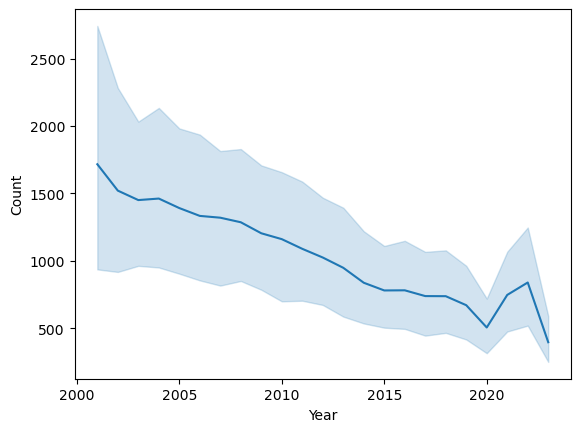

In [62]:
# first creating yearly column from datetime index 
crime_df['Year']=crime_df['Datetime'].dt.year
# making a groupby using new year column to group with descriptions and including counts
crimes_by_year=crime_df.groupby('Year')['Description'].value_counts().sort_index()
# printing counts by year to quickly see trend in crime counts
print(crime_df['Year'].value_counts())
# converting groupby to df and resetting index to plot
crimes_by_year=crimes_by_year.to_frame('Count').reset_index()
# plotting
sns.lineplot(crimes_by_year,x='Year',y='Count');

* Overall, there is a downward trend in number of crimes. Crime decreases over the years.

### 4) Comparing Months:
* What months have the most crime? What months have the least?
Are there any individual crimes that do not follow this pattern? If so, which crimes?


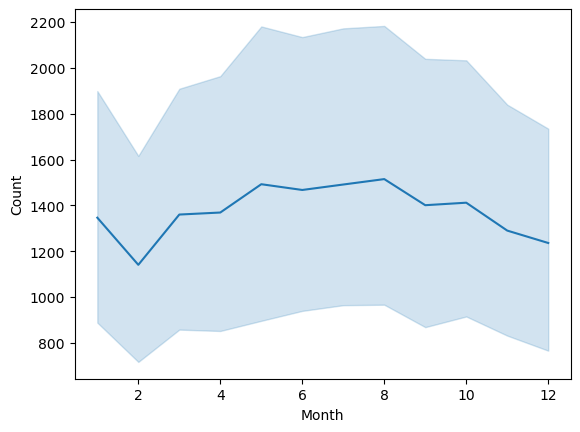

In [67]:
# creating a month column to easily groupby
crime_df['Month']=crime_df['Datetime'].dt.month
# grouping months by description to make a df for plotting
monthly_crime=crime_df.groupby('Month')['Description'].value_counts().sort_index()
monthly_crime_df=monthly_crime.to_frame('Count').reset_index()
# plotting
sns.lineplot(monthly_crime_df,x='Month',y='Count');

According to plot, the months with the most crime are June and August. The months with the least are February, and December.

In [89]:
# a simple value_counts() limited as it may be can give us more than we need
monthly_crime_df.value_counts()

Month  Description                                      Count
1      $500 AND UNDER                                   46901    1
9      AGGRAVATED DOMESTIC BATTERY - HANDGUN            6        1
       AGG PRO.EMP: OTHER DANG WEAPON                   222      1
       AGG PRO.EMP: HANDGUN                             48       1
       AGG PRO EMP HANDS SERIOUS INJ                    33       1
                                                                ..
4      VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS   5        1
       VIOLENT OFFENDER: DUTY TO REGISTER               15       1
       VIOLENT OFFENDER: ANNUAL REGISTRATION            20       1
       VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS  2        1
12     WIREROOM/SPORTS                                  4        1
Length: 5680, dtype: int64

Some individual crimes that don't fall into monthts with the most crime include: 'AGG PRO.EMP: OTHER DANG WEAPON', 'AGG PRO.EMP: HANDGUN','VIOLENT OFFENDER: ANNUAL REGISTRATION', and 'VIOLENT OFFENDER: DUTY TO REGISTER.'